In [1]:
import pandas as pd

### Reading the data

In [5]:
df = pd.read_csv('../data/ecommerceDatasetNLP.csv', header=None)
df.columns = ['label', 'text']
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [6]:
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [7]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

label    0
text     0
dtype: int64

In [16]:
df.shape

(50424, 2)

In [22]:
print(df[df['label'] == 'Electronics']['text'].iloc[0])

Dell 19.5V-3.34AMP 65W Laptop Adapter (Without power Cord) Design Features of Dell Laptop - Power adapter - 65 Watt (No Power Cable) The Dell 65-Watt Inspiron AC Power Adapter helps you to charge Dell laptops, with screen size ranging from 13-inches to 17-inches. The Inspiron power adapter provides you with continuous power supply. The adapter is lightweight for ease of use. The 3-pronged plug design of the Dell Inspiron laptop adapter prevents voltage drop. You can easily plug it into any wall outlet to deliver AC power to your laptop


### Text Preprocessing

In [27]:
from nltk import word_tokenize
from nltk.corpus import stopwords

STOP_WORDS = set(stopwords.words('english'))

In [28]:
def word_tokenization(text):
    words = word_tokenize(text)
    return words


def remove_stopwords(text):
    words = word_tokenization(text)
    for stop_word in STOP_WORDS:
        if stop_word in words:
            words.remove(stop_word)
    return words

In [29]:
def clean_text(text):
    tokens1 = remove_stopwords(text)
    return tokens1

### Tf-IDF Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)
X_train = tfidf.fit_transform(df['text'])
X_train.shape

(50424, 144456)

### Split the Data

In [31]:
from sklearn.model_selection import train_test_split

y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X_train, y, random_state= 0, stratify= y, test_size=0.25)

### Build the Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,max_depth=1, max_leaf_nodes=2)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=1, max_leaf_nodes=2, n_estimators=10)

In [33]:
y_pred = rf.predict(x_test)
y_pred

array(['Household', 'Household', 'Household', ..., 'Household',
       'Household', 'Household'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.39227352054577186

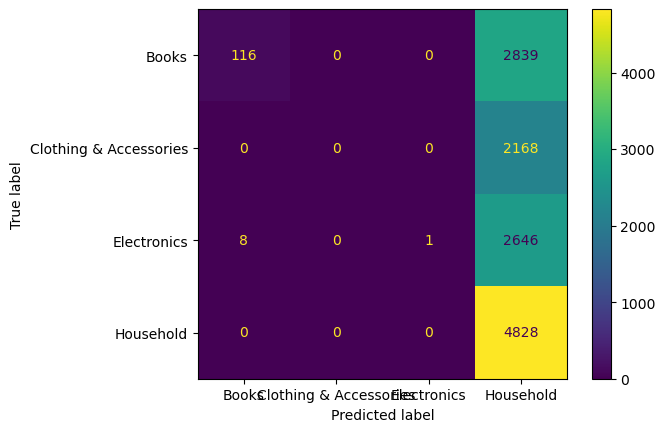

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()

def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x for x in tokens2 if x not in stopwords.words('english')]
    tokens4 = []
    tags = pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0], pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0], pos='a'))
    
    return tokens4

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (replace this with your dataset)
data = {
    'text': [
        'This is a positive statement',
        'I am feeling great today',
        'This is a negative statement',
        'I am not feeling well',
        'I feel terrible'
    ],
    'label': ['positive', 'positive', 'negative', 'negative', 'negative']
}

# Creating a DataFrame from the sample data
df = pd.DataFrame(data)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Accuracy and Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dai/anaconda3/lib/python3.11/site-packa